<a href="https://colab.research.google.com/github/NadaMuhammad28/Data_Mining_project/blob/main/Breast_cancer_prediction_using_Decision_trees_SVM_DP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import tree
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier


#from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt

##About DataSet

>Breast Cancer Wisconsin (Diagnostic) Data Set
Predict whether the cancer is benign or malignant
  
  **source:**  UCI Machine Learning 

  
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. 


Attribute Information:
1. ID number
2. Diagnosis (M = malignant, B = benign)
3-32)
Ten real-valued features are computed for each cell nucleus:
* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
*  concave points (number of concave portions of the contour)
*  symmetry
* fractal dimension ("coastline approximation" - 1)




The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.


##UPLOAD CSV FILE

In [69]:
breast_cancer_data =  pd.read_csv('/content/data.csv',header=0)
breast_cancer_data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [70]:
print(breast_cancer_data.shape)

(569, 33)


In [71]:
breast_cancer_data['Unnamed: 32'].unique()

array([nan])

In [ ]:
#remove Unnamed 32 attr sinve it's an array of nan values 
# axis 1 means we are droping the column
breast_cancer_data.drop(columns='Unnamed: 32', axis = 1, inplace=True)

#remove 'id' attr since it is not useful for the prediction procedure 
breast_cancer_data.drop("id",axis=1,inplace=True)

In [83]:
breast_cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


##Checking data types
diagnosis --> categrocal attribute ------   remaining attributes --> numerical

In [84]:

# checking the data types

breast_cancer_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

##Data preprcessing

---



convert the categrical attr to a numeric class where M-->1 and B-->0


In [85]:
breast_cancer_data['Target']=breast_cancer_data['diagnosis'].map({'M':1,'B':0})

remove diagnosis column

In [87]:
breast_cancer_data.drop(columns='diagnosis', axis = 1, inplace=True)


In [88]:
breast_cancer_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [89]:
breast_cancer_data["Target"].unique()

array([1, 0])

Removal of any Duplicate rows (if any)


In [90]:

r,c = breast_cancer_data.shape

temp = breast_cancer_data.copy()
temp.drop_duplicates(inplace=True)
temp.reset_index(drop=True,inplace=True)

if temp.shape==(r,c):
    print(' The dataset doesn\'t have any duplicates')
else:
    print('Duplicates have been dropped ')
    breast_cancer_data= temp.copy()

 The dataset doesn't have any duplicates


checking for missing values

In [91]:
breast_cancer_data.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Target                     0
dtype: int64


---


REMOVE OUTLIERS

---



Z score = (x -mean) / std. deviation.
If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.


In [92]:
from scipy.stats import zscore
z_scores = zscore(breast_cancer_data)
#z_scores --> ndarray with zscores of each value 

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

new_df = breast_cancer_data[filtered_entries]


In [93]:
breast_cancer_data.shape[0]- new_df.shape[0] 
#74 outliers were removed 


74

In [94]:
breast_cancer_data= new_df.copy()

##DATA VISUALIZATION

In [95]:
breast_cancer_data['Target'].value_counts()

0    332
1    163
Name: Target, dtype: int64

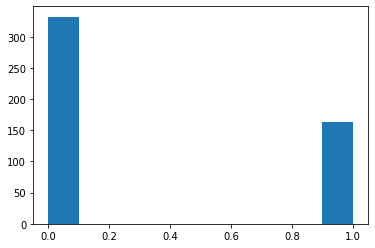

In [96]:
#hist of target class
plt.hist(breast_cancer_data ['Target'])
plt.show()

plotting the histogram after removing the outliers

SMOTE --> Synthetic Minority Oversampling Technique
for minority class--> link eac point with it neighboures and create another sample in the range/ between this link/ the two data points

In [98]:
#Fixing the imbalance using SMOTE Technique
from imblearn.over_sampling import SMOTE
temp = breast_cancer_data.copy()

print('Original class distribution:')
print(temp['Target'].value_counts())

X = temp.drop(['Target'],axis=1)
Y = temp['Target']

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

temp = pd.DataFrame(X, columns=temp.columns)
temp['Target'] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())
breast_cancer_data = temp.copy()

Original class distribution:
0    332
1    163
Name: Target, dtype: int64

Class distribution after applying SMOTE Technique:
1    332
0    332
Name: Target, dtype: int64


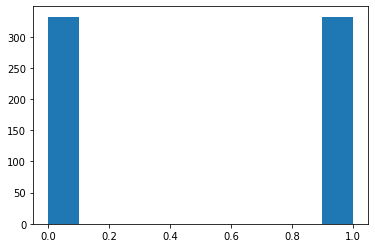

In [99]:

plt.hist(breast_cancer_data ['Target'])
plt.show()

##SPLITING THE DATA INTO  80%--> train, 20%--> test

In [100]:
X.shape

(664, 30)

In [101]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [102]:
print( X_train.shape, X_test.shape)

(531, 30) (133, 30)


In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
x_train= pd.DataFrame(X_train_std, columns=X.columns)

X_test_std = scaler.transform(X_test)
x_test= pd.DataFrame(X_test_std, columns=X.columns)


## DECISION TREE CLASSIFIER

> DT steps:
1. compute overall entropy (p)
2. compute entropy 
3. computr weighted entrpy (M)
4. compute information gain  P-M

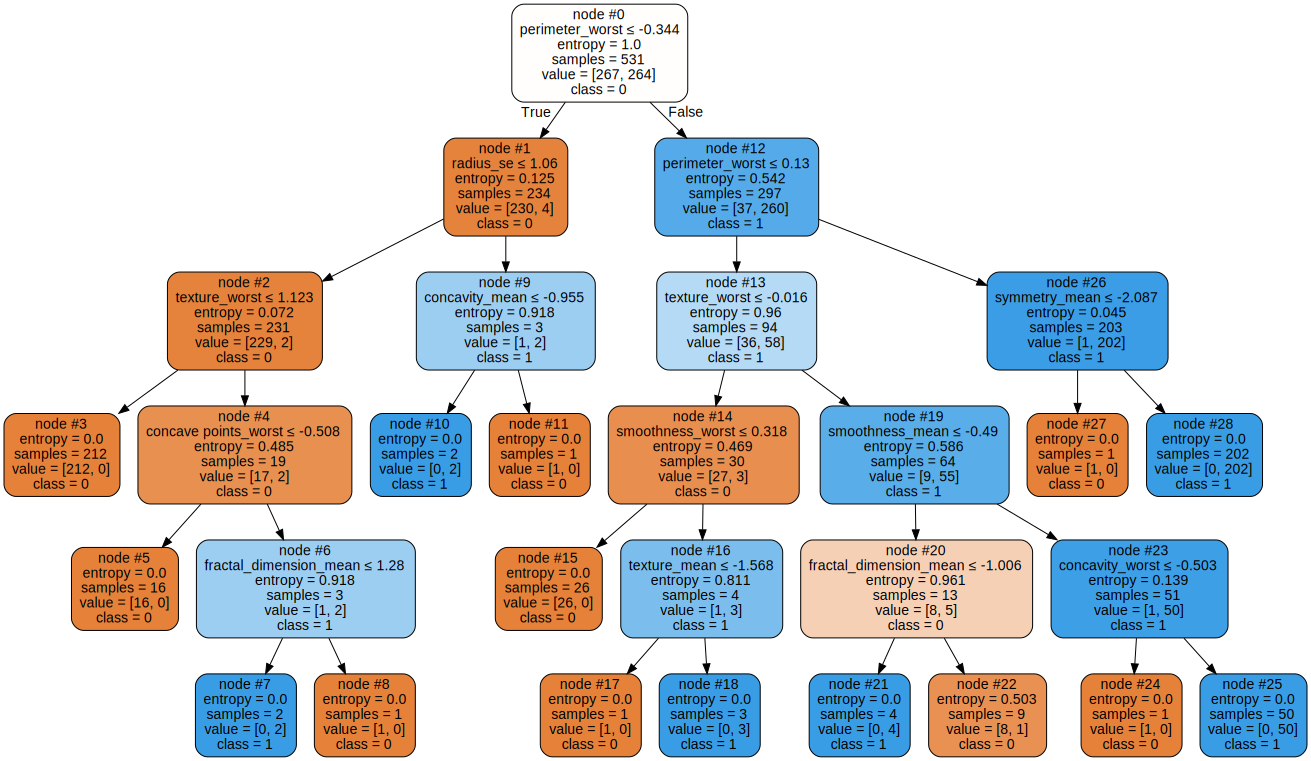

In [104]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz 


# Information gain
DT= tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
DT = DT.fit(x_train, y_train)


#Vizualizing the tree
feature_names = list(X.columns)
infoG_tree = tree.export_graphviz(DT, 
                                feature_names=feature_names,
                                class_names=['0','1'],
                                filled=True, rounded=True,  
                                special_characters=True, node_ids= True)

infoG_graph = graphviz.Source(infoG_tree)
infoG_graph


[[60  5]
 [ 3 65]]


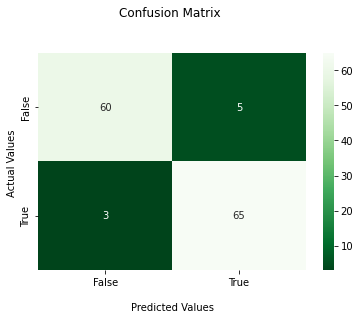

In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix

#model evaluation
y_test_pred = DT.predict(x_test)               
infoG_matrix = confusion_matrix(y_test, y_test_pred)
print (infoG_matrix) 

import seaborn as sns

ax = sns.heatmap(infoG_matrix, annot=True, cmap='Greens_r')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [106]:
print("Accuracy:",accuracy_score(y_test, y_test_pred)*100)

Accuracy: 93.98496240601504


without pre-pruning

---



---



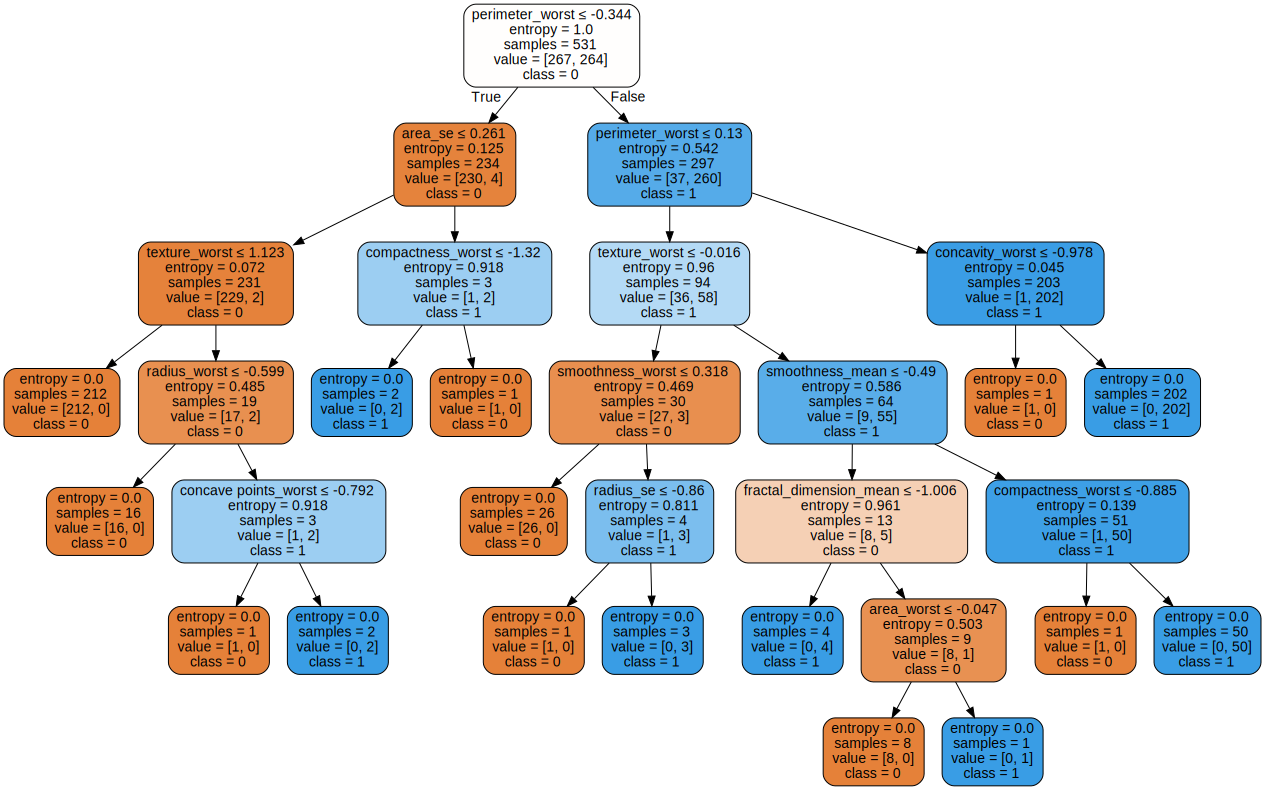

In [107]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz 


# Information gain
DT= DecisionTreeClassifier(criterion="entropy")
DT = DT.fit(x_train, y_train)


#Vizualizing the tree
feature_names = list(X.columns)
infoG_tree = tree.export_graphviz(DT, out_file= None, 
                                feature_names=feature_names,
                                class_names=['0','1'],
                                filled=True, rounded=True,  
                                special_characters=True)

infoG_graph = graphviz.Source(infoG_tree)
infoG_graph


[[60  5]
 [ 1 67]]
              precision    recall  f1-score   support

      benign       0.98      0.92      0.95        65
   malignant       0.93      0.99      0.96        68

    accuracy                           0.95       133
   macro avg       0.96      0.95      0.95       133
weighted avg       0.96      0.95      0.95       133



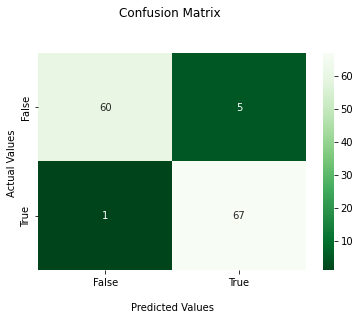

In [108]:
#model evaluation
y_test_pred = DT.predict(x_test)               
infoG_matrix = confusion_matrix(y_test, y_test_pred)
print (infoG_matrix) 

print(classification_report(y_test, y_test_pred, target_names=["benign", "malignant"]))


import seaborn as sns

ax = sns.heatmap(infoG_matrix, annot=True, cmap='Greens_r')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [109]:
print("Accuracy:",accuracy_score(y_test, y_test_pred)*100)

Accuracy: 95.48872180451127


In [110]:
#Visualising Function
def AUC_ROC_plot(y_test, y_test_pred):    
    ref = [0 for _ in range(len(y_test))]
    ref_auc = roc_auc_score(y_test, ref)
    lr_auc = roc_auc_score(y_test, y_test_pred)

    ns_fpr, ns_tpr, _ = roc_curve(y_test, ref)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, y_test_pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(y_test, y_test_pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

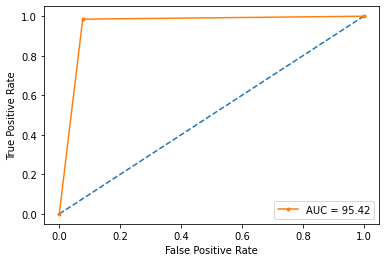

In [111]:
AUC_ROC_plot(y_test, y_test_pred)

In [112]:
from sklearn.metrics import roc_auc_score
auc_valid = roc_auc_score(y_test, y_test_pred)

print("AUC Valid = {}".format( round(auc_valid,4)))

AUC Valid = 0.9542


##SVM CLASSIFIER

1. gamma --> controls the distance of influence of a single tr point
* high value --> decision boundary depends on the points nearby only (might be non-straight line)
* low value --> decision boundary depends on fat=r point too 
2. C:
* large value --> small margin (caring about classifying each point right)
* low value --> maximizing the margin

In [113]:
from sklearn.svm import SVC


In [114]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
g=GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [1,0.1,0.01,0.001,0.0001,1.1,1.2],'kernel': ('linear', 'rbf')})
 
g.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1.1, 1.2],
                         'kernel': ('linear', 'rbf')})

In [115]:
g.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [116]:
g.best_estimator_

SVC(C=10, gamma=0.001)

In [117]:
grid_pred = g.predict(x_test)

[[62  3]
 [ 1 67]]


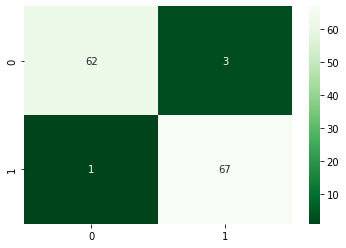

In [118]:
print(confusion_matrix(y_test,grid_pred))
sns.heatmap(confusion_matrix(y_test,grid_pred), annot=True, fmt='d', cmap='Greens_r')
plt.show()

In [119]:
# Print train set accuracy
print("Train set accuracy: {:.2f}".format(g.score(x_train, y_train)))

# Print test set accuracy
print("Test set accuracy: {:.2f}".format(g.score(x_test, y_test)))



Train set accuracy: 0.98
Test set accuracy: 0.97


#BUILDING A NEURAL NETWORK 

In [120]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential,Model
from keras.layers import Activation, Dense, Dropout, Flatten, Input, Add
from sklearn.metrics import roc_curve
from keras.callbacks import Callback




---
spliting the tes size into a validation set and test set

---




In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=2)
X_train_std = scaler.fit_transform(X_train)
x_train= pd.DataFrame(X_train_std, columns=X.columns)

X_test_std = scaler.transform(X_test)
x_test= pd.DataFrame(X_test_std, columns=X.columns)

In [122]:
print( X_train.shape, X_test.shape)

(597, 30) (67, 30)


In [123]:

# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')
])



In [124]:
# compiling the Neural Network

model.compile(optimizer = keras.optimizers.Adam(lr=0.01),
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

#history = model.fit(x_train, y_train, validation_split=0.1, epochs=30)

callback= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 15)
history = model.fit(x_train, y_train, validation_split=0.1, epochs=15,     callbacks=[callback])



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
17/17 [==============================] - 1s 18ms/step - loss: 0.2037 - accuracy: 0.9162 - val_loss: 0.0854 - val_accuracy: 0.9667
Epoch 2/15
17/17 [==============================] - 0s 4ms/step - loss: 0.0598 - accuracy: 0.9870 - val_loss: 0.0512 - val_accuracy: 0.9667
Epoch 3/15
17/17 [==============================] - 0s 4ms/step - loss: 0.0462 - accuracy: 0.9851 - val_loss: 0.0528 - val_accuracy: 0.9667
Epoch 4/15
17/17 [==============================] - 0s 4ms/step - loss: 0.0369 - accuracy: 0.9907 - val_loss: 0.0477 - val_accuracy: 0.9833
Epoch 5/15
17/17 [==============================] - 0s 4ms/step - loss: 0.0291 - accuracy: 0.9944 - val_loss: 0.0606 - val_accuracy: 0.9667
Epoch 6/15
17/17 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9926 - val_loss: 0.0722 - val_accuracy: 0.9667
Epoch 7/15
17/17 [==============================] - 0s 4ms/step - loss: 0.0218 - accuracy: 0.9926 - val_loss: 0.0676 - val_accuracy: 0.9667
Epoch 8/15
17/17 [=

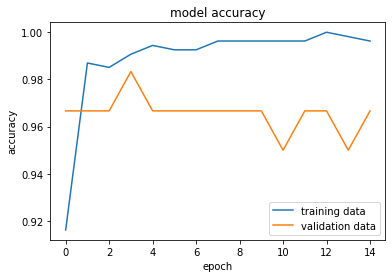

In [125]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')





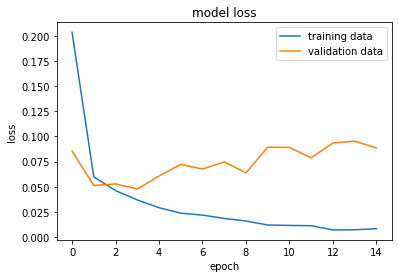

In [126]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [127]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

3/3 [==============================] - 0s 6ms/step - loss: 0.1382 - accuracy: 0.9403
0.9402984976768494
